<a href="https://colab.research.google.com/github/SamuelSousaFerreira/Mercado-Financeiro/blob/main/Finan%C3%A7as_Quantitativas_Automa%C3%A7%C3%A3o_de_Fun%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Python para Finanças Quantitativa**
Curso do canal [**Outspoken Market**](https://youtu.be/o_-YNEKQE_U).

In [82]:
#Carregando as bibliotecas necessárias

from pandas_datareader import data as pdr #suporte para download do yahoofinance
from datetime import date
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [38]:
!pip install yfinance #instalando
import yfinance as yf
yf.pdr_override()

In [83]:
# configurações iniciais
ticker = "^BVSP" #ativo 
inicio = '2015-01-01'
fin = '2021-06-01'

In [84]:
# Coleta de dados
df = pdr.get_data_yahoo(ticker, start=inicio, end=fin) #método do pdr

[*********************100%***********************]  1 of 1 completed


In [85]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-05-25,124032.0,124696.0,122701.0,122988.0,122988.0,8914500
2021-05-26,122988.0,124256.0,122988.0,123989.0,123989.0,8258400
2021-05-27,123989.0,124537.0,123470.0,124367.0,124367.0,0
2021-05-28,124367.0,125698.0,124284.0,125561.0,125561.0,8838500
2021-05-31,125561.0,126216.0,125540.0,126216.0,126216.0,5946500


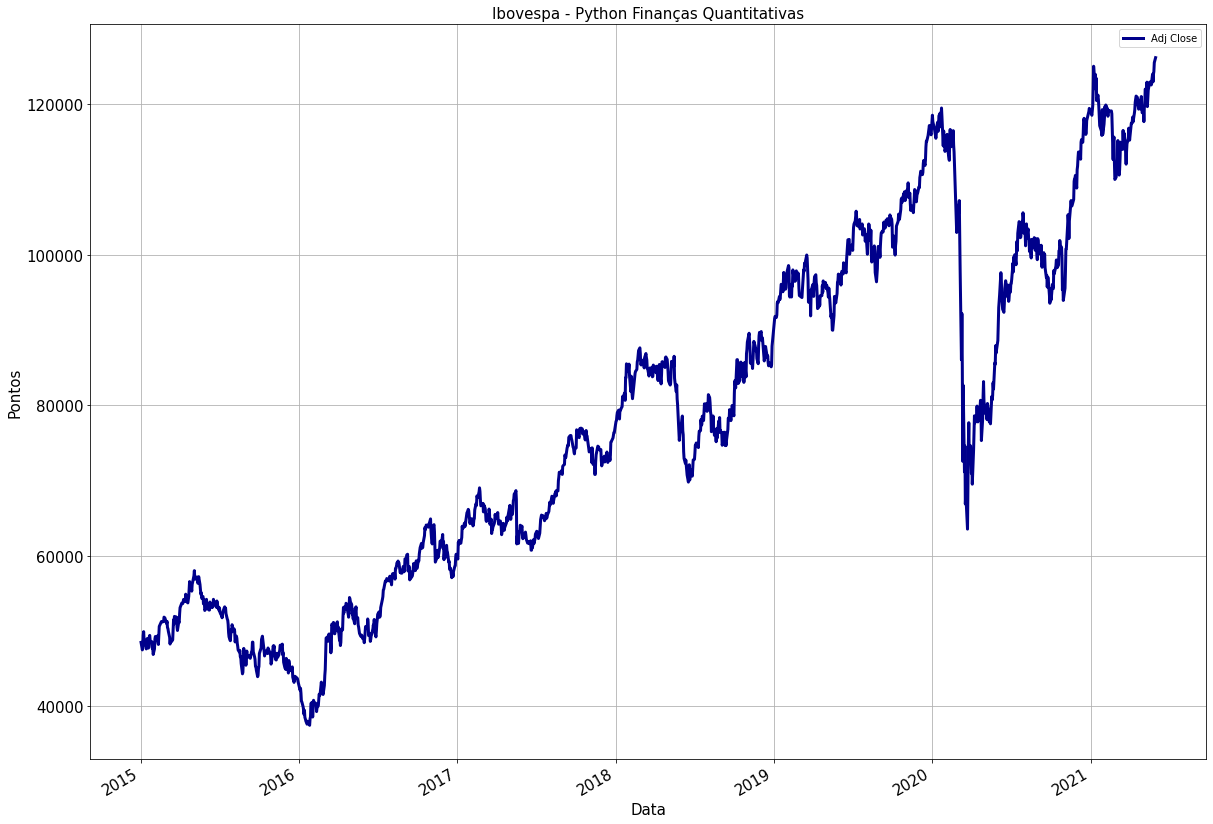

In [86]:
# Primeiro gráfico
df['Adj Close'].plot(grid=True, figsize=(20,15), linewidth=3, 
                     fontsize=15, color='darkblue')
plt.xlabel('Data', fontsize=15);
plt.ylabel('Pontos', fontsize=15);
plt.title('Ibovespa - Python Finanças Quantitativas', fontsize=15);
plt.legend();


In [87]:
# Calculando as bandas de bollinger

#Parâmetros iniciais
periodo =21
desvios = 2

df['desvio'] = df['Adj Close'].rolling(periodo).std()
df['MM'] = df['Adj Close'].rolling(periodo).mean()
df['Band_Sup'] = df['MM'] + (df['desvio']*desvios)
df['Band_Inf'] = df['MM'] - (df['desvio']*desvios)

In [88]:
#filtrando os valores missings, devido a criação de colunas com rolling
df = df.dropna(axis=0)

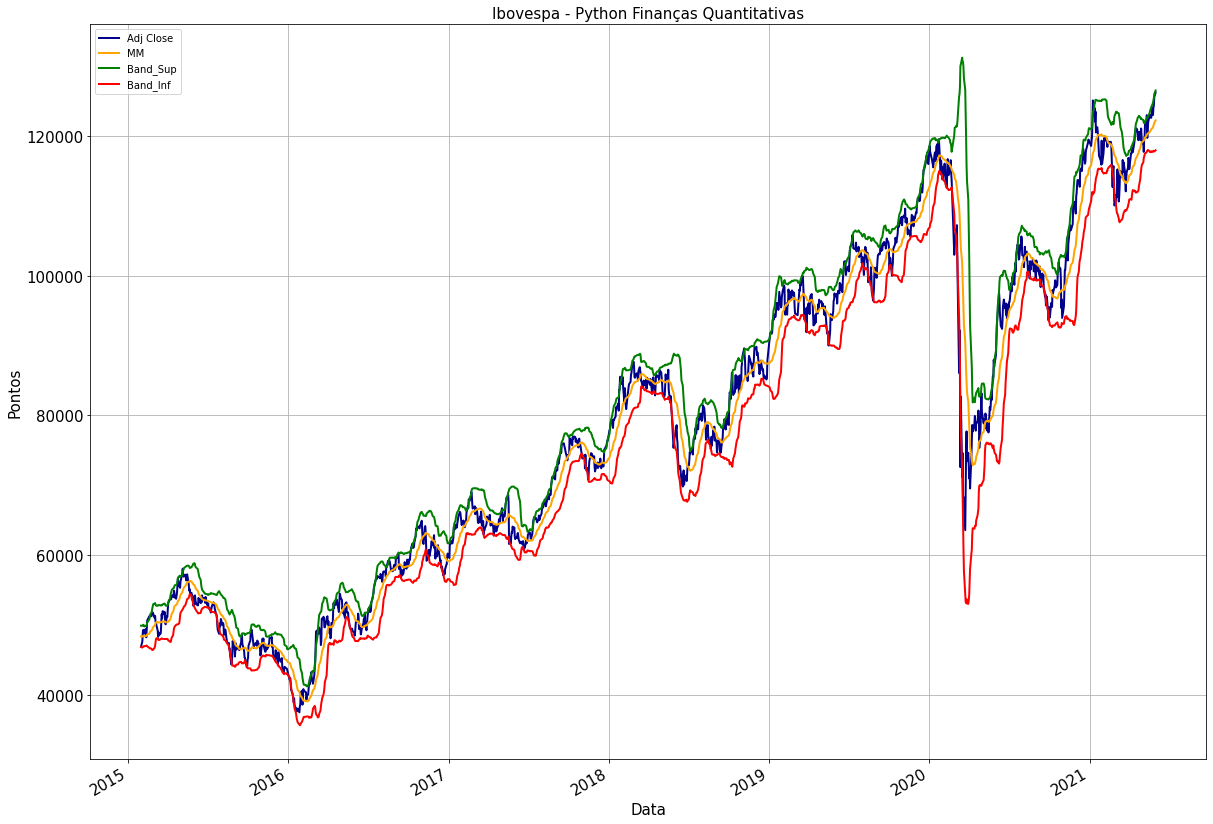

In [89]:
# Inserindo tudo no gráfico

df[['Adj Close','MM','Band_Sup','Band_Inf']].plot(grid = True,
                                                    figsize= (20,15),
                                                    linewidth=2,
                                                    fontsize=15,
                                                    color=['darkblue','orange','green','red'])

plt.xlabel('Data', fontsize=15);
plt.ylabel('Pontos', fontsize=15);
plt.title('Ibovespa - Python Finanças Quantitativas', fontsize=15);
plt.legend();

In [90]:
#Construção dos alvos, estratégia
periodos = 1

#Alvo  - Retorno
df.loc[:,'Retorno'] = df['Adj Close'].pct_change(periodos)
df.loc[:,'Alvo'] = df['Retorno'].shift(periodos)


In [91]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,desvio,MM,Band_Sup,Band_Inf,Retorno,Alvo
Date,,,,,,,,,,,,
2015-01-30,47759.0,47759.0,46484.0,46908.0,46908.0,4846600,765.248161,48369.380952,49899.877274,46838.884631,NaN,NaN
2015-02-02,46933.0,47684.0,46760.0,47651.0,47651.0,3247800,780.145017,48328.380952,49888.670986,46768.090918,0.015840,NaN
2015-02-03,47664.0,48993.0,47664.0,48964.0,48964.0,4819800,768.716212,48397.285714,49934.718138,46859.853291,0.027555,0.015840
2015-02-04,48965.0,49718.0,48214.0,49301.0,49301.0,4811300,787.326909,48459.190476,50033.844295,46884.536658,0.006883,0.027555
2015-02-05,49299.0,49816.0,49020.0,49234.0,49234.0,4004000,774.205150,48448.285714,49996.696014,46899.875414,-0.001359,0.006883


In [92]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,desvio,MM,Band_Sup,Band_Inf,Retorno,Alvo
Date,,,,,,,,,,,,
2021-05-25,124032.0,124696.0,122701.0,122988.0,122988.0,8914500,1749.749257,121232.476190,124731.974704,117732.977677,-0.008417,0.011746
2021-05-26,122988.0,124256.0,122988.0,123989.0,123989.0,8258400,1794.724535,121451.571429,125041.020499,117862.122358,0.008139,-0.008417
2021-05-27,123989.0,124537.0,123470.0,124367.0,124367.0,0,1900.507918,121609.380952,125410.396789,117808.365116,0.003049,0.008139
2021-05-28,124367.0,125698.0,124284.0,125561.0,125561.0,8838500,2049.805076,121871.047619,125970.657770,117771.437468,0.009601,0.003049
2021-05-31,125561.0,126216.0,125540.0,126216.0,126216.0,5946500,2138.888476,122219.714286,126497.491238,117941.937333,0.005217,0.009601


In [93]:
df.dropna(axis=0, inplace=True)

In [94]:
#Criando a Regra de Trade
df.loc[:,"Regra"] = np.where(df.loc[:,'Adj Close'] > df.loc[:,'Band_Sup'],1,0)

df.loc[:,"Regra"] = np.where(df.loc[:, "Adj Close"] < df.loc[:,'Band_Inf'],-1,df.loc[:,'Regra'])

In [95]:
# Aplicando a regra no alvo
df.loc[:, 'Trade'] = df.loc[:,"Regra"]*df.loc[:,'Alvo']

In [96]:
#Calculando o resultado acumulado em juros simples

df.loc[:,'Retorno_Trade_BB'] = df['Trade'].cumsum()

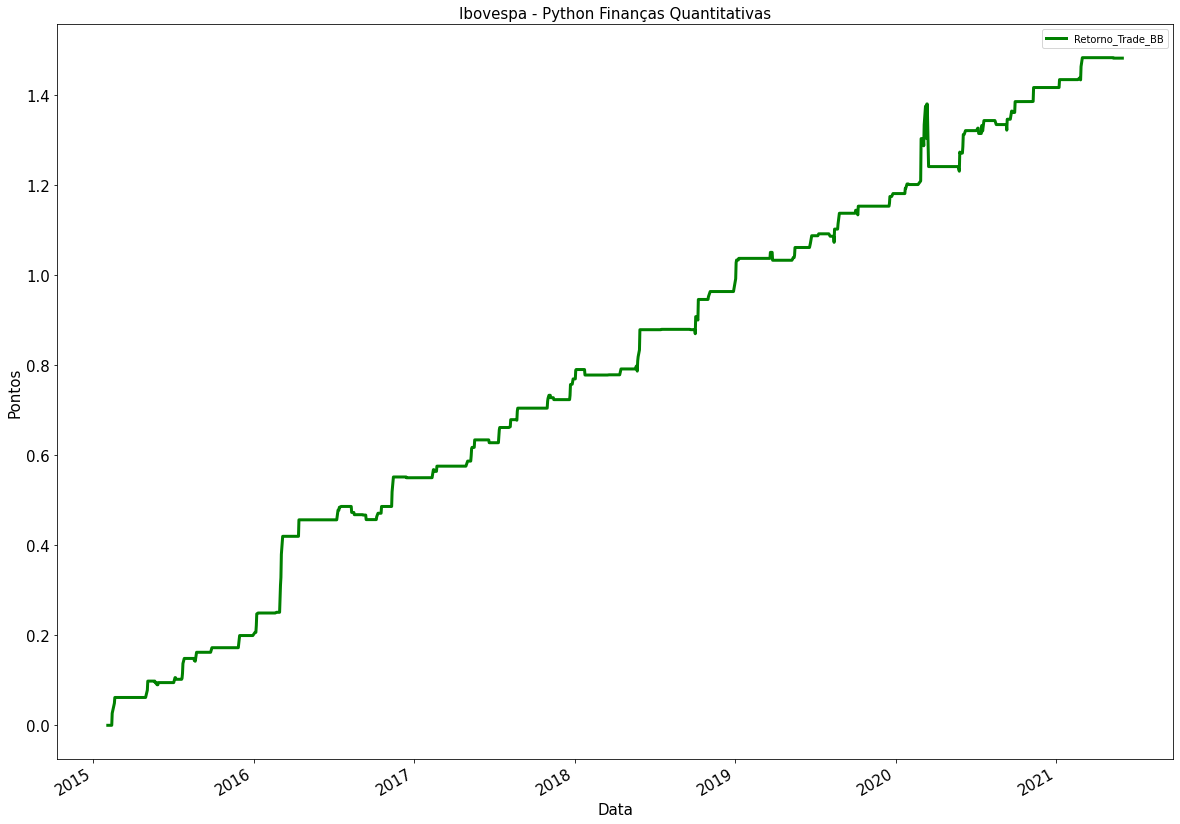

In [97]:
df['Retorno_Trade_BB'].plot(figsize=(20,15), linewidth=3,fontsize=15, color='green')

plt.xlabel('Data', fontsize=15);
plt.ylabel('Pontos', fontsize=15);
plt.title('Ibovespa - Python Finanças Quantitativas', fontsize=15);
plt.legend();

# **Automação com funções**

In [98]:
def om_bolinger(ticker,periodo,desvios,inicio, fim, alvo):

  df = pdr.get_data_yahoo(ticker,start=inicio,end=fim)
  df['desvio'] =df['Adj Close'].rolling(periodo).std()
  df['MM'] = df['Adj Close'].rolling(periodo).mean()
  df['Banda_Sup'] = df['MM'] + (df['desvio'] * desvios)
  df['Banda_Inf'] = df['MM'] - (df['desvio'] * desvios)

  #filtrando valores missing
  df = df.dropna(axis=0)

  #Construção dos alvos
  df.loc[:, 'Retorno'] = df['Adj Close'].pct_change(alvo)
  df.loc[:, 'Alvo'] = df.Retorno.shift(alvo)

  #filtrando valores missing
  df = df.dropna(axis=0)

  #Criando as regras de Trade
  df.loc[:, "Regra"] = np.where(df.loc[:, 'Adj Close'] > df.loc[:, 'Banda_Sup'],1,0)
  df.loc[:, "Regra"] = np.where(df.loc[:, 'Adj Close'] < df.loc[:, 'Banda_Inf'],-1, df.loc[:,'Regra'])
  
  #Aplicando a Regra no 
  df.loc[:,'Trade'] = df.loc[:,'Regra']* df.loc[:,"Alvo"]

  #Calculando o Resultado acumulado em juros simples
  df.loc[:, "Retorno_Trade_BB"] = df['Trade'].cumsum()

  return(df)

In [100]:
#parâmetros da função
ticker = '^BVSP'
inicio ='2015-01-01'
fim = '2021-06-02'
periodo = 50
desvios =2
alvo= 5

In [101]:
def om_bollinger(ticker, periodo, desvios, inicio, fim, alvo):
    
    df = pdr.get_data_yahoo(ticker, start = inicio, end = fim)
    df["desvio"] = df["Adj Close"].rolling(periodo).std()
    df["MM"] = df["Adj Close"].rolling(periodo).mean()
    df["Banda_Sup"] = df["MM"] + (df["desvio"]*desvios)
    df["Banda_Inf"] = df["MM"] - (df["desvio"]*desvios)
    
    # Filtrando os valores missing
    df = df.dropna(axis = 0) 
    
    # Construcao dos alvos
    df.loc[:, "Retorno"] = df["Adj Close"].pct_change(alvo)
    df.loc[:, "Alvo"] = df["Retorno"].shift(-alvo)
    
    # Filtrando os valores missing
    df = df.dropna(axis = 0) 
    
    # Criando a regra de trade
    df.loc[:, "Regra"] = np.where(df.loc[:, "Adj Close"] > df.loc[:, "Banda_Sup"], 1, 0)
    df.loc[:, "Regra"] = np.where(df.loc[:, "Adj Close"] < df.loc[:, "Banda_Inf"], -1, df.loc[: , "Regra"])

    # Aplicando a regra no alvo
    df.loc[:, "Trade"] = df.loc[:, "Regra"]*df.loc[:, "Alvo"]
    
    # Calculando o resultado acumulado em juros simples
    df.loc[:, "Retorno_Trade_BB"] = df["Trade"].cumsum()
    
    return(df)

In [102]:
om_bollinger(ticker,periodo,desvios,inicio,fim,alvo)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,desvio,MM,Banda_Sup,Banda_Inf,Retorno,Alvo,Regra,Trade,Retorno_Trade_BB
Date,,,,,,,,,,,,,,,
2015-03-23,51970.0,52178.0,51516.0,51908.0,51908.0,3397500,1443.133609,49543.40,52429.667217,46657.132783,0.062643,-0.012811,0,-0.0,-0.000000
2015-03-24,51908.0,52223.0,51006.0,51506.0,51506.0,3436500,1465.689028,49596.72,52528.098057,46665.341943,0.024282,-0.006912,0,-0.0,-0.000000
2015-03-25,51507.0,52319.0,51507.0,51858.0,51858.0,4774600,1484.469641,49671.08,52640.019283,46702.140717,0.006443,0.008948,0,0.0,0.000000
2015-03-26,51835.0,51835.0,50528.0,50580.0,50580.0,3638500,1470.958737,49721.84,52663.757474,46779.922526,-0.007340,0.050277,0,0.0,0.000000
2015-03-27,50575.0,50575.0,49909.0,50095.0,50095.0,3927700,1440.892902,49770.82,52652.605804,46889.034196,-0.036023,0.072702,0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-19,122976.0,123013.0,121595.0,122636.0,122636.0,8825300,3123.074513,118132.46,124378.609027,111886.310973,0.024442,0.011033,0,0.0,2.864882
2021-05-20,122636.0,122734.0,122136.0,122701.0,122701.0,7906400,3030.296975,118359.86,124420.453950,112299.266050,0.016528,0.013578,0,0.0,2.864882
2021-05-21,122701.0,122799.0,121760.0,122592.0,122592.0,9493600,2978.688683,118556.18,124513.557367,112598.802633,0.005834,0.024219,0,0.0,2.864882


In [103]:
#Pegando apenas o resultado que é a última linha
om_bollinger(ticker, periodo, desvios, inicio, fim, alvo).iloc[-1]

[*********************100%***********************]  1 of 1 completed


Open                1.240320e+05
High                1.246960e+05
Low                 1.227010e+05
Close               1.229880e+05
Adj Close           1.229880e+05
Volume              8.914500e+06
desvio              3.016636e+03
MM                  1.189137e+05
Banda_Sup           1.249470e+05
Banda_Inf           1.128804e+05
Retorno             6.505123e-05
Alvo                4.292289e-02
Regra               0.000000e+00
Trade               0.000000e+00
Retorno_Trade_BB    2.864882e+00
Name: 2021-05-25 00:00:00, dtype: float64

In [104]:
def om_bollinger_resultado(ticker, periodos, desvios, inicio, fim, alvo):
    
    df = pdr.get_data_yahoo(ticker, start = inicio, end = fim)
    df["desvio"] = df["Adj Close"].rolling(periodo).std()
    df["MM"] = df["Adj Close"].rolling(periodo).mean()
    df["Banda_Sup"] = df["MM"] + (df["desvio"]*desvios)
    df["Banda_Inf"] = df["MM"] - (df["desvio"]*desvios)
    
    # Filtrando os valores missing
    df = df.dropna(axis = 0) 
    
    # Construcao dos alvos
    df.loc[:, "Retorno"] = df["Adj Close"].pct_change(alvo)
    df.loc[:, "Alvo"] = df["Retorno"].shift(-alvo)
    
    # Filtrando os valores missing
    df = df.dropna(axis = 0) 
    
    # Criando a regra de trade
    df.loc[:, "Regra"] = np.where(df.loc[:, "Adj Close"] > df.loc[:, "Banda_Sup"], 1, 0)
    df.loc[:, "Regra"] = np.where(df.loc[:, "Adj Close"] < df.loc[:, "Banda_Inf"], -1, df.loc[: , "Regra"])

    # Aplicando a regra no alvo
    df.loc[:, "Trade"] = df.loc[:, "Regra"]*df.loc[:, "Alvo"]
    
    # Calculando o resultado acumulado em juros simples
    df.loc[:, "Retorno_Trade_BB"] = df["Trade"].cumsum()
    
    return(df.iloc[-1][-1])

In [105]:
om_bollinger_resultado(ticker, periodo, desvios, inicio, fim, alvo)

[*********************100%***********************]  1 of 1 completed


2.8648817092154744

In [106]:
# Com múltiplos resultados
display(om_bollinger_resultado(ticker, 20, 1, inicio, fim, 5))
display(om_bollinger_resultado(ticker, 20, 3, inicio, fim, 5))

[*********************100%***********************]  1 of 1 completed


2.8625264417980105

[*********************100%***********************]  1 of 1 completed


1.338114224136695

In [107]:
# Funçao para plotar o grafico

def plot_resultado(data_frame):
    data_frame["Retorno_Trade_BB"].plot(figsize=(20, 15), linewidth = 3, fontsize = 15, color = "green")
    plt.xlabel("Data"
           , fontsize = 15);
    plt.ylabel("Pontos"
           , fontsize = 15);
    plt.title("Resultado BB Trading - Python Finanças Quantitativas"
           , fontsize = 25)
    plt.legend();

In [108]:
dados = om_bollinger(ticker, periodo, desvios, inicio, fim, alvo)

[*********************100%***********************]  1 of 1 completed


In [109]:
dados.head()

,Open,High,Low,Close,Adj Close,Volume,desvio,MM,Banda_Sup,Banda_Inf,Retorno,Alvo,Regra,Trade,Retorno_Trade_BB
Date,,,,,,,,,,,,,,,
2015-03-23,51970.0,52178.0,51516.0,51908.0,51908.0,3397500,1443.133609,49543.40,52429.667217,46657.132783,0.062643,-0.012811,0,-0.0,-0.0
2015-03-24,51908.0,52223.0,51006.0,51506.0,51506.0,3436500,1465.689028,49596.72,52528.098057,46665.341943,0.024282,-0.006912,0,-0.0,-0.0
2015-03-25,51507.0,52319.0,51507.0,51858.0,51858.0,4774600,1484.469641,49671.08,52640.019283,46702.140717,0.006443,0.008948,0,0.0,0.0
2015-03-26,51835.0,51835.0,50528.0,50580.0,50580.0,3638500,1470.958737,49721.84,52663.757474,46779.922526,-0.007340,0.050277,0,0.0,0.0
2015-03-27,50575.0,50575.0,49909.0,50095.0,50095.0,3927700,1440.892902,49770.82,52652.605804,46889.034196,-0.036023,0.072702,0,0.0,0.0


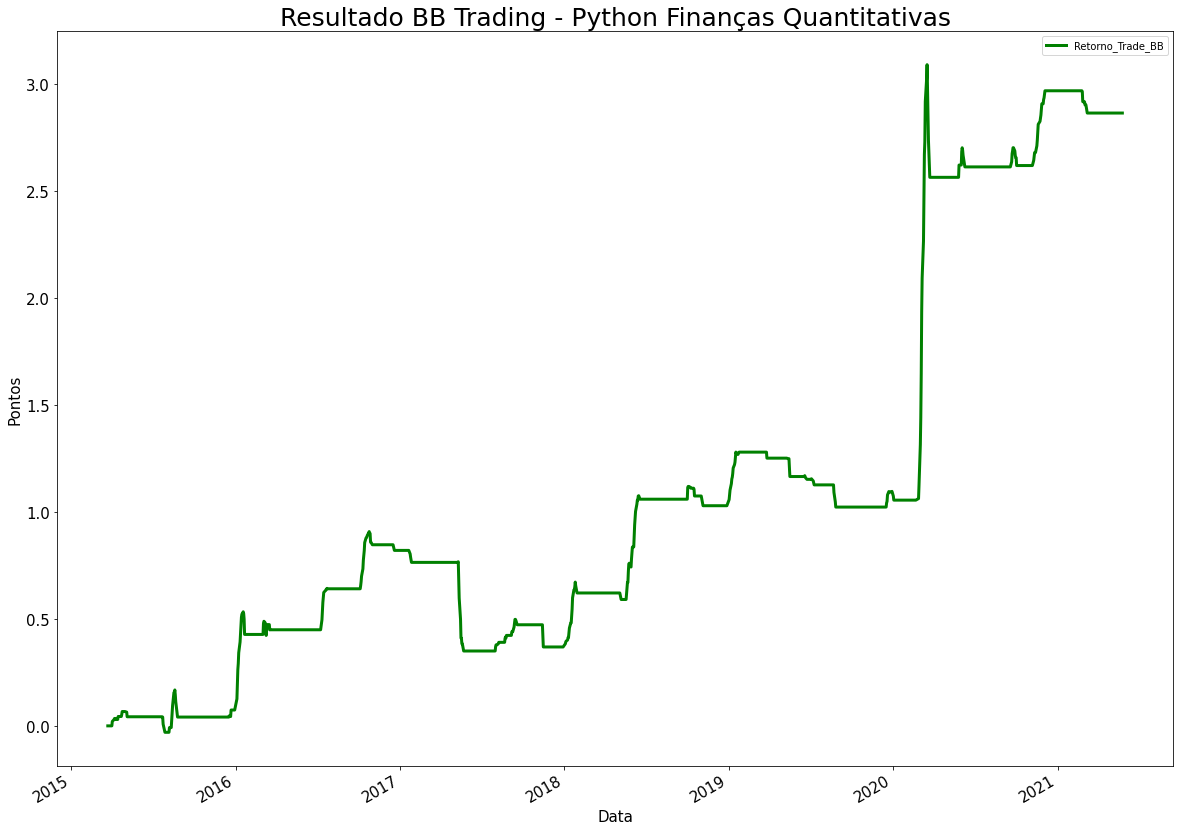

In [110]:
plot_resultado(dados)